# 카카오톡 대화 사용자별 빈도 분석

In [2]:
import pickle
from pprint import pprint
import pandas as pd
import nltk

In [6]:
with open("data/cleaned_katalk_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

                  date user                                            message
0  2016. 3. 7. 오후 3:41   YH  안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 ...
1  2016. 3. 7. 오후 3:51   WH                                           네 안녕하세요 
2  2016. 3. 7. 오후 5:14   YH  넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님
3  2016. 3. 7. 오후 5:21   KS                            엠티관련해서 참석여부 투표를 말씀하신건가요
4  2016. 3. 7. 오후 5:22   YH                       네 저희 이번 토욜 관련해서도 투표를 올려야 해서요
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     14911 non-null  object
 1   user     14911 non-null  object
 2   message  14911 non-null  object
dtypes: object(3)
memory usage: 349.6+ KB
None


In [8]:
users = set(data["user"])
users

{'BJ', 'BR', 'GM', 'HL', 'KS', 'WH', 'YH'}

In [9]:
authors = data.groupby('user')
pprint(authors.groups)
print(type(authors.groups))

{'BJ': Int64Index([ 1161,  1162,  1164,  1168,  1169,  1173,  1179,  1180,  1181,
             1185,
            ...
            14857, 14859, 14863, 14864, 14877, 14878, 14880, 14883, 14885,
            14886],
           dtype='int64', length=4222),
 'BR': Int64Index([   23,    25,    32,    54,    77,    78,    79,    80,    83,
               84,
            ...
            14887, 14890, 14892, 14893, 14896, 14901, 14902, 14904, 14906,
            14910],
           dtype='int64', length=2824),
 'GM': Int64Index([  272,   351,   405,   564,   652,   715,   736,   814,   821,
              904,
            ...
            14671, 14674, 14676, 14680, 14684, 14688, 14691, 14695, 14697,
            14700],
           dtype='int64', length=554),
 'HL': Int64Index([   19,    20,    49,    50,    52,    55,    57,   115,   116,
              118,
            ...
            14871, 14876, 14888, 14889, 14891, 14895, 14897, 14899, 14903,
            14907],
           dtype='int64', length=

In [10]:
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc)

{'BJ': [1161, 1162, 1164, 1168, 1169, 1173, 1179, 1180, 1181, 1185, 1189, 1192, 1199, 1200, 1201, 1203, 1205, 1208, 1219, 1220, 1221, 1223, 1224, 1229, 1240, 1241, 1246, 1247, 1254, 1255, 1257, 1259, 1263, 1265, 1274, 1275, 1276, 1277, 1283, 1285, 1289, 1290, 1292, 1298, 1301, 1315, 1316, 1317, 1324, 1325, 1326, 1327, 1329, 1332, 1333, 1336, 1340, 1341, 1342, 1345, 1350, 1353, 1354, 1362, 1369, 1370, 1375, 1377, 1378, 1383, 1386, 1387, 1390, 1391, 1392, 1393, 1398, 1399, 1404, 1405, 1407, 1408, 1409, 1410, 1411, 1414, 1421, 1422, 1423, 1424, 1436, 1441, 1447, 1448, 1451, 1454, 1459, 1461, 1462, 1465, 1467, 1471, 1472, 1475, 1476, 1477, 1478, 1495, 1496, 1499, 1503, 1504, 1505, 1506, 1507, 1513, 1514, 1515, 1517, 1521, 1522, 1524, 1530, 1535, 1536, 1540, 1542, 1555, 1556, 1558, 1559, 1560, 1561, 1564, 1565, 1567, 1572, 1579, 1580, 1581, 1582, 1584, 1593, 1594, 1596, 1601, 1604, 1605, 1613, 1614, 1622, 1632, 1635, 1636, 1639, 1640, 1642, 1643, 1647, 1648, 1651, 1652, 1655, 1660, 1662, 16

In [12]:
user1_msg = [str(data["message"][idx]) for idx in author2doc['WH']]
user1_msg

['네 안녕하세요 ',
 ' 제일 수고가 많으시네요 ',
 '안성만 교수님은 휴대폰 번호를 알려주지 않으셨네요 ',
 '권순범 교수님께는 제가 연락 드릴게요 ',
 '임동진 교수님 외에 다른 분들은 연락드렸어요',
 '장운호 교수님 참석  전창환 교수님 일정 확인 후 알려주신다고',
 '안성만  권순범 교수님 연구실로 연락드렸는데 계속 부재중이시라 메일 드렸어요',
 '네',
 '총무님들 오늘 시간 되시면 두 분 교수님 연구실로 연락 부탁드려요 ',
 '네 감사합니다 ',
 '수고하셨어요 ',
 '내일 휴대폰 번호 여쭤봐야 겠네요',
 '일요일은 쉬어야 하는데 미션이 주어졌네요 ',
 '1 SQL 교수님이 공지 하셨는데 조 구성을 해야합니다 사이버강의실 공지사항참조 하세요',
 '2 DA 설치 하고픈 사람 조사',
 ' ',
 '3 이번 토요일 점심식사 조윤호 교수님과 함께할 사람 15명 지원자 모집',
 '부회장님 2번  총무님 3번 진행 부탁드려요',
 '오늘은 푹 쉬시고 주중에 부탁드려요 ',
 ' ',
 '상관없어요 나머지 15명은 23주 뒤 주임교수님과 점심합니다',
 '아',
 '넵 감사합니다 검색해보니 청향 이네요',
 '일단 SQL 다룰줄 아는 사람이 몇명일지 알아봐야 할것 같아요 ',
 '네앱 ',
 '감사요  1조가 더 있어야 할텐대요 음 기술 맡으실분 더 있을까요 ',
 '오 오오',
 '네 어떤 부탁이요힘듦',
 '아 네 원하시는대로 ',
 '주귀복 님 자원해주셨어요 ',
 ' 하루만에 많이 내셨네요',
 'it쪽 손들라고 했을때 5명 이었던 것 같기도 하구여',
 '앗 숨은 고수가 ',
 '그렇죠 통계 아시는 분도 1분씩 배분',
 ' 즐거운 한우되세요',
 '한주 헉 ',
 '퇴근들은 하셨나요 전 오늘도 야근임니당  조는 5개 6개 어떻게 할까요',
 '기술마스터 지원자',
 ' 동지시군요',
 '저도 sql은 10년 전에 써본 실력이라 ',
 '저도 밥 묵으러 갑니다',
 '그럼 6개조로 하고 단톡방에 공지 올려 조 선택하게 하죠 일

In [13]:
import nltk

total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

1936


In [14]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

1480
[('아', 27),
 ('나도', 16),
 ('네', 14),
 ('그럼', 14),
 ('오늘', 10),
 ('난', 9),
 ('오', 8),
 ('잘', 8),
 ('넵', 7),
 ('다', 7)]


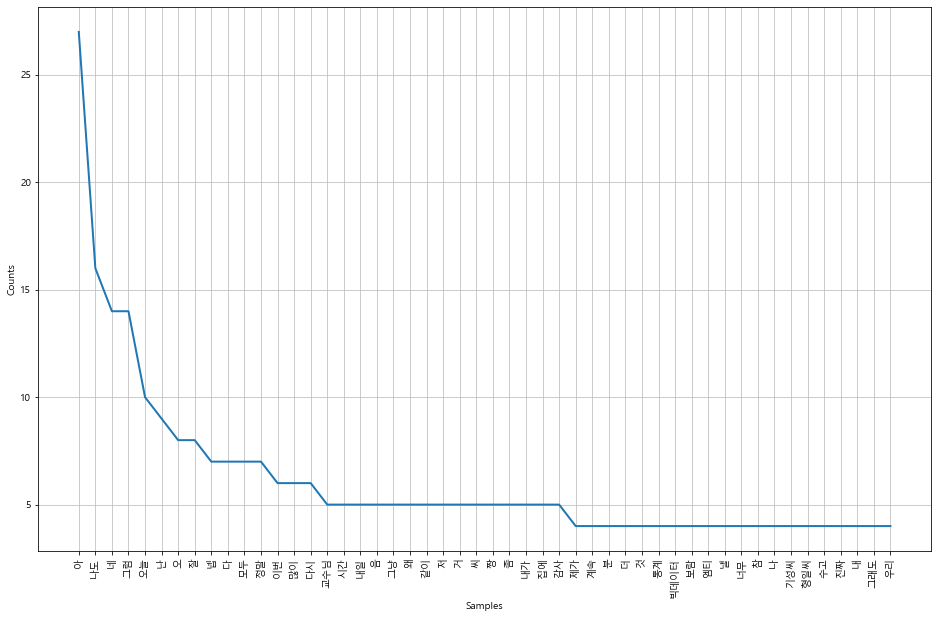

In [15]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

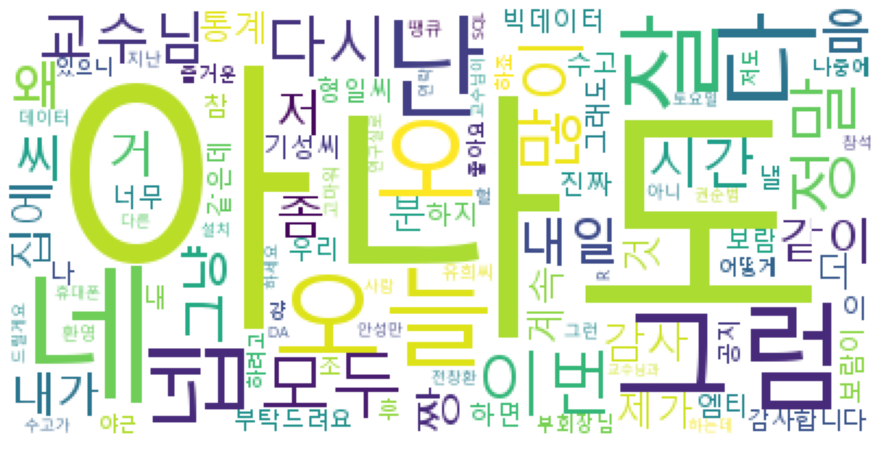

In [18]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["Message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

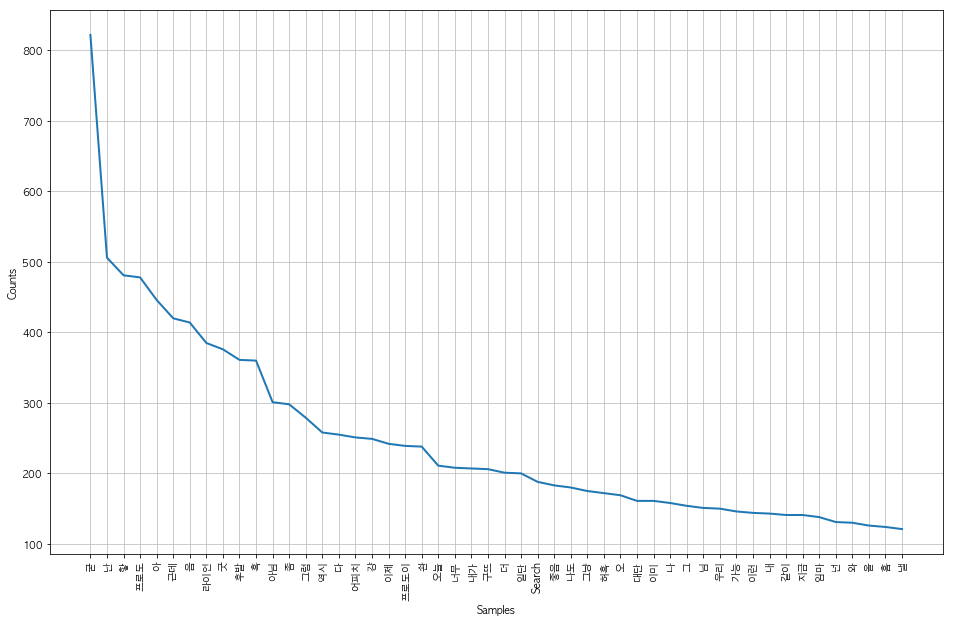

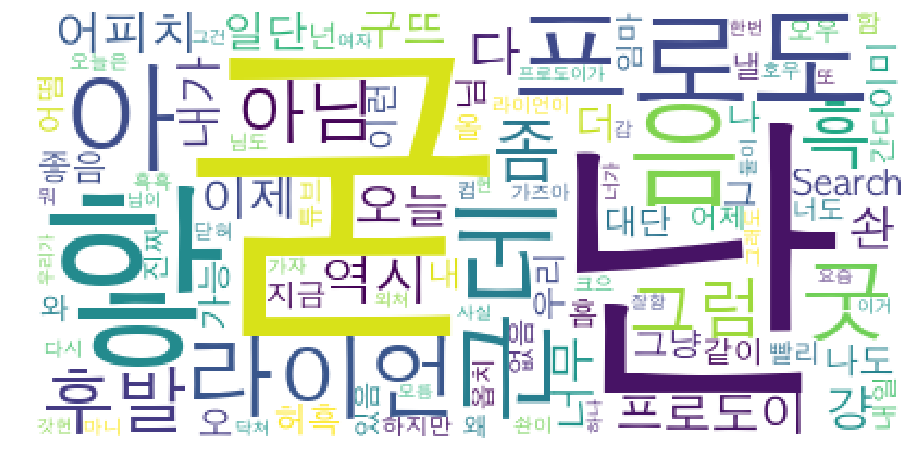

In [12]:
user_freq_analysis("무지", data, author2doc)